In [ ]:
%pip install imbalanced-learn

In [2]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Loading The Data
data = pd.read_csv('creditcard.csv')

# Displaying Class Distribution
print("Class Distribution:")
print(data['Class'].value_counts())


Class Distribution:
0    284315
1       492
Name: Class, dtype: int64


In [3]:
# Data Preprocessing and Rescaling

# Dropping the 'Class' column to separate predictors
predictors = data.drop(columns=['Class'])

# Checking min and max values of the original predictors
min_vals = predictors.min()
max_vals = predictors.max()
print(pd.DataFrame({'min': min_vals, 'max': max_vals}))

# Rescaling predictors
scaler = StandardScaler()
predictors_rescaled = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Checking min and max values after rescaling
min_vals_rescaled = predictors_rescaled.min()
max_vals_rescaled = predictors_rescaled.max()
print(pd.DataFrame({'min_after_rescaling': min_vals_rescaled, 'max_after_rescaling': max_vals_rescaled}))

# Combining rescaled predictors with the target variable
data_rescaled = pd.concat([data['Class'], predictors_rescaled], axis=1)

# Setting a random seed for reproducibility
np.random.seed(23)

# Sampling 10,000 records from the dataset
sample = data_rescaled.sample(n=10000)

print("Sampled Data:")
print(sample.head())


               min            max
Time      0.000000  172792.000000
V1      -56.407510       2.454930
V2      -72.715728      22.057729
V3      -48.325589       9.382558
V4       -5.683171      16.875344
V5     -113.743307      34.801666
V6      -26.160506      73.301626
V7      -43.557242     120.589494
V8      -73.216718      20.007208
V9      -13.434066      15.594995
V10     -24.588262      23.745136
V11      -4.797473      12.018913
V12     -18.683715       7.848392
V13      -5.791881       7.126883
V14     -19.214325      10.526766
V15      -4.498945       8.877742
V16     -14.129855      17.315112
V17     -25.162799       9.253526
V18      -9.498746       5.041069
V19      -7.213527       5.591971
V20     -54.497720      39.420904
V21     -34.830382      27.202839
V22     -10.933144      10.503090
V23     -44.807735      22.528412
V24      -2.836627       4.584549
V25     -10.295397       7.519589
V26      -2.604551       3.517346
V27     -22.565679      31.612198
V28     -15.43

In [8]:
# Data Sampling and SMOTE

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define SMOTE and under-sampling strategy
smote = SMOTE(sampling_strategy=0.1, random_state=23)
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=23)

# Create a combined SMOTE and under-sampling pipeline
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

# Apply SMOTE and under-sampling
X = sample.drop(columns=['Class'])
y = sample['Class']
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Check class distribution after resampling
from collections import Counter
print("Class distribution after SMOTE and under-sampling:")
print(Counter(y_resampled))

# Combine resampled data into a single DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Class')], axis=1)

# Display resampled data
print("Resampled Data:")
print(resampled_data.head())


Class distribution after SMOTE and under-sampling:
Counter({0: 1994, 1: 997})
Resampled Data:
          Time        V1        V2        V3        V4        V5        V6  \
6680 -0.599832 -0.093392  0.492615  0.949942 -0.478189 -0.049270 -0.759227   
538   1.343141  1.036788  0.141644 -0.970822  0.367153  0.208380 -0.797845   
8583  0.135848  0.966871 -0.362940  0.032214  0.360348 -0.617374  0.107374   
3791 -0.061402 -0.131477  0.846380 -0.296317 -0.136845  0.351642 -0.736253   
6869  1.292938 -0.590787 -0.227851 -0.659787 -0.455610  0.288567 -1.090331   

            V7        V8        V9  ...       V21       V22       V23  \
6680  0.555730 -0.188254 -0.447716  ... -0.033654 -0.045789 -0.199549   
538   0.201295 -0.250587  0.280656  ... -0.427403 -1.029355  0.636011   
8583 -0.908778  0.192061  2.616195  ... -0.074875  0.173616  0.364946   
3791  0.494257  0.165211  0.864353  ... -0.542240 -1.216784  0.413277   
6869 -0.059194  0.112746 -1.280426  ...  0.114973  0.171126 -0.453418   

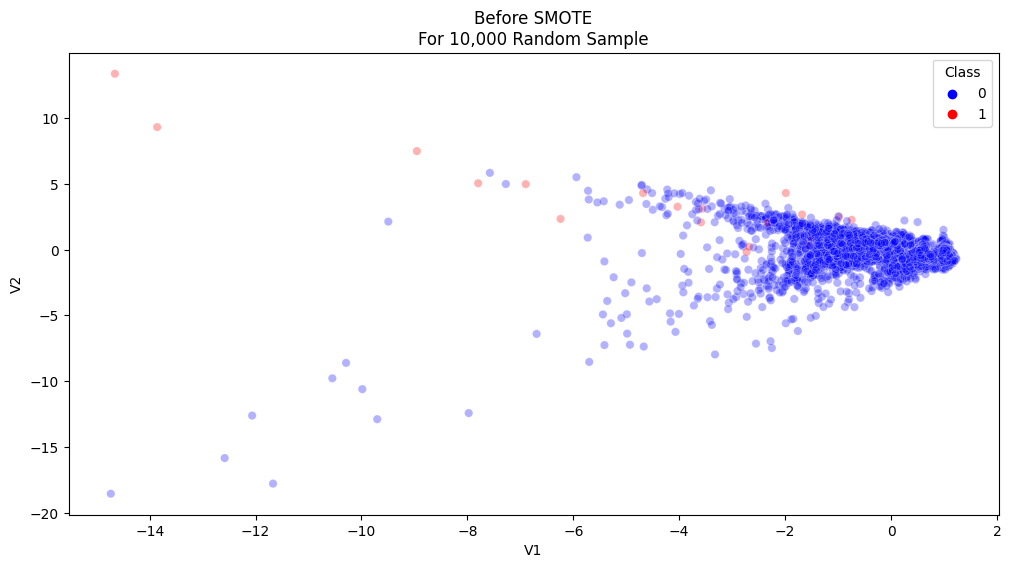

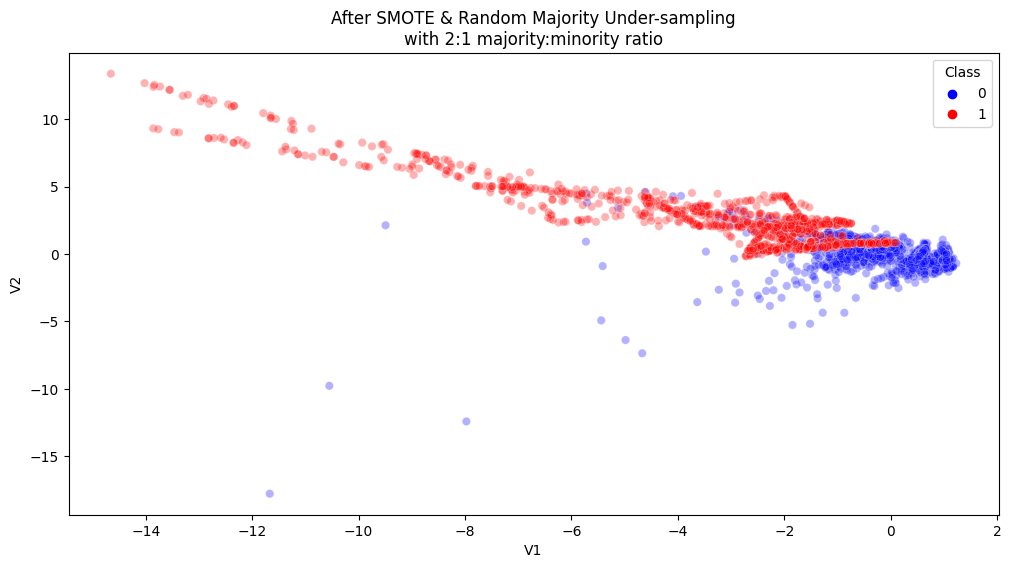

In [10]:
# Data Visualization Before and After SMOTE

import seaborn as sns
import matplotlib.pyplot as plt

# Before SMOTE
plt.figure(figsize=(12, 6))
sns.scatterplot(x=sample['V1'], y=sample['V2'], hue=sample['Class'].astype(str), alpha=0.3, palette={'0': 'blue', '1': 'red'})
plt.title('Before SMOTE\nFor 10,000 Random Sample')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(title='Class', loc='upper right')
plt.show()

# After SMOTE and Under-sampling
plt.figure(figsize=(12, 6))
sns.scatterplot(x=resampled_data['V1'], y=resampled_data['V2'], hue=resampled_data['Class'].astype(str), alpha=0.3, palette={'0': 'blue', '1': 'red'})
plt.title('After SMOTE & Random Majority Under-sampling\nwith 2:1 majority:minority ratio')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(title='Class', loc='upper right')
plt.show()


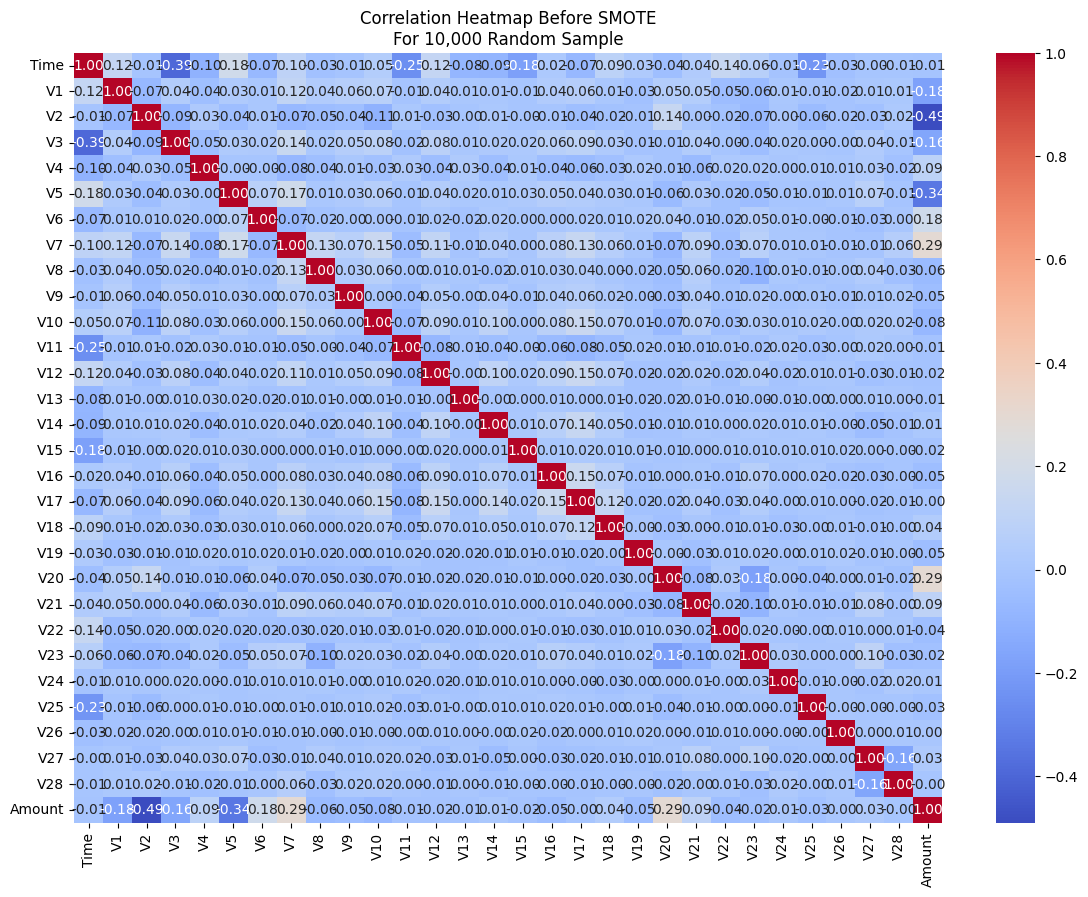

In [13]:
# Correlation Heatmap Before SMOTE
plt.figure(figsize=(14, 10))
corr = sample.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap Before SMOTE\nFor 10,000 Random Sample')
plt.show()

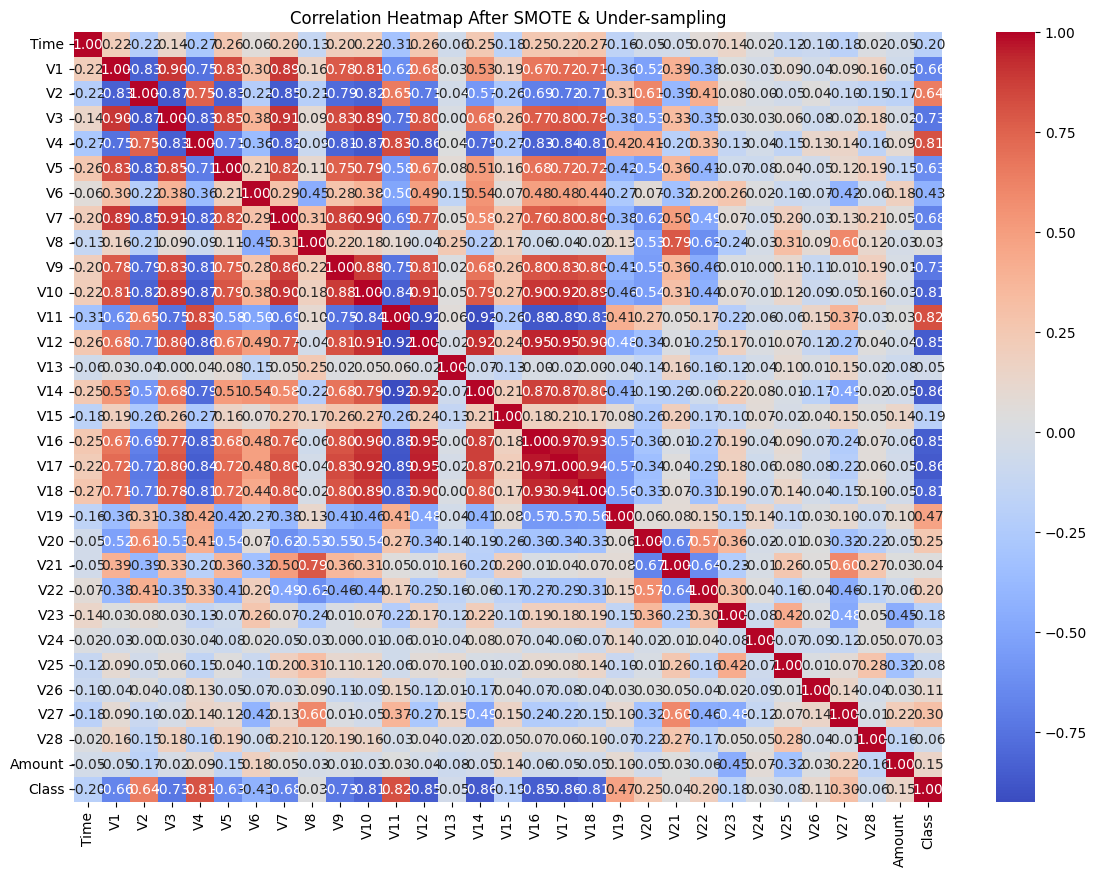

In [14]:
# Correlation Heatmap After SMOTE
plt.figure(figsize=(14, 10))
corr = resampled_data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap After SMOTE & Under-sampling')
plt.show()

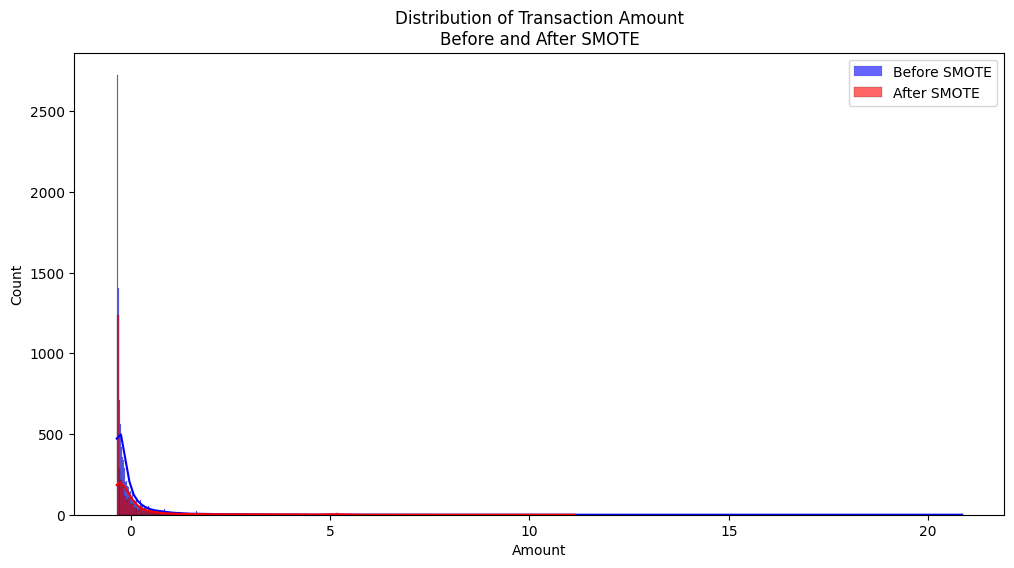

In [16]:

# Distribution Plot of 'Amount' Before and After SMOTE
plt.figure(figsize=(12, 6))
sns.histplot(sample['Amount'], kde=True, color='blue', label='Before SMOTE', alpha=0.6)
sns.histplot(resampled_data['Amount'], kde=True, color='red', label='After SMOTE', alpha=0.6)
plt.title('Distribution of Transaction Amount\nBefore and After SMOTE')
plt.xlabel('Amount')
plt.legend()
plt.show()

In [11]:
# Model Training and Evaluation

# Convert target variable to categorical
sample['Class'] = sample['Class'].astype('category')
train_index = sample.sample(frac=0.75, random_state=23).index

# Splitting the data into training and testing sets
train = sample.loc[train_index]
test = sample.drop(train_index)

# SMOTE for 50-50 balance
smote_50 = SMOTE(sampling_strategy=1.0, random_state=23)
X_train_50, y_train_50 = smote_50.fit_resample(train.drop(columns=['Class']), train['Class'])

# SMOTE for 75-25 balance
smote_75 = SMOTE(sampling_strategy=0.75, random_state=23)
X_train_75, y_train_75 = smote_75.fit_resample(train.drop(columns=['Class']), train['Class'])

# Train a Random Forest model on the original training data
rf = RandomForestClassifier(n_estimators=500, max_features=5, random_state=23)
rf.fit(train.drop(columns=['Class']), train['Class'])

# Predict on the test set
rf_pred = rf.predict(test.drop(columns=['Class']))
print("Confusion Matrix for Original Data:")
print(confusion_matrix(test['Class'], rf_pred))
print("Classification Report for Original Data:")
print(classification_report(test['Class'], rf_pred))

# Train a Random Forest model on the 50-50 balanced data
rf_50 = RandomForestClassifier(n_estimators=500, max_features=5, random_state=23)
rf_50.fit(X_train_50, y_train_50)

# Predict on the test set
rf_pred_50 = rf_50.predict(test.drop(columns=['Class']))
print("Confusion Matrix for 50-50 Balanced Data:")
print(confusion_matrix(test['Class'], rf_pred_50))
print("Classification Report for 50-50 Balanced Data:")
print(classification_report(test['Class'], rf_pred_50))

# Train a Random Forest model on the 75-25 balanced data
rf_75 = RandomForestClassifier(n_estimators=500, max_features=5, random_state=23)
rf_75.fit(X_train_75, y_train_75)

# Predict on the test set
rf_pred_75 = rf_75.predict(test.drop(columns=['Class']))
print("Confusion Matrix for 75-25 Balanced Data:")
print(confusion_matrix(test['Class'], rf_pred_75))
print("Classification Report for 75-25 Balanced Data:")
print(classification_report(test['Class'], rf_pred_75))

# Training other models (logistic regression, Naive Bayes, etc.) and their ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

# Create individual models
models = [
    ('lr', LogisticRegression(max_iter=1000, random_state=23)),
    ('nb', GaussianNB()),
    ('lda', LinearDiscriminantAnalysis())
]

# Ensemble model
ensemble = VotingClassifier(estimators=models, voting='soft')

# Train ensemble model
ensemble.fit(X_train_50, y_train_50)

# Predict on the validation set
ensemble_pred = ensemble.predict(test.drop(columns=['Class']))

print("Confusion Matrix for Ensemble Model:")
print(confusion_matrix(test['Class'], ensemble_pred))
print("Classification Report for Ensemble Model:")
print(classification_report(test['Class'], ensemble_pred))


Confusion Matrix for Original Data:
[[2492    0]
 [   1    7]]
Classification Report for Original Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2492
           1       1.00      0.88      0.93         8

    accuracy                           1.00      2500
   macro avg       1.00      0.94      0.97      2500
weighted avg       1.00      1.00      1.00      2500

Confusion Matrix for 50-50 Balanced Data:
[[2492    0]
 [   0    8]]
Classification Report for 50-50 Balanced Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2492
           1       1.00      1.00      1.00         8

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

Confusion Matrix for 75-25 Balanced Data:
[[2492    0]
 [   0    8]]
Classification Report for 75-25 Balanced Data:
          